## DPS에 기반한 이혼 분류(예측)
- https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 입력(170x55, 54개의 attribute)
df = pd.read_csv('./data/divorce.csv', sep=';')

In [3]:
# 속성과, class를 구분
x = df.loc[:, :"Atr54"].values  # (170x54)
y = df.loc[:, "Class"].values   # (170x1)

In [4]:
# 학습 전, test와 train 데이터 무작위 분류
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
# StandardScaler를 사용하여 평균 0, 표준편차1로 정규화, 최적화와 속도 향상 기대
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # 학습할 데이터 정규화
x_test = sc.transform(x_test)  # 검증 데이터 정규화

In [8]:
x_train.shape

(136, 54)

### 특징 추출(LDA, PCA)
#### LDA

<AxesSubplot:xlabel='devorce', ylabel='1d_train'>

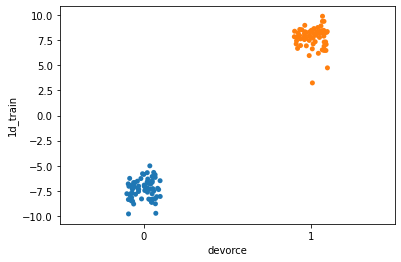

In [39]:
#LDA를 사용한 차원 감소를 통한 특징 추출
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)                                 # 1차원 벡터로 사영
x_train_lda = lda.fit_transform(x_train, y_train)         # 학습에서 클래스가 주어지는 교사학습 
x_test_lda = lda.transform(x_test)

#LDA 결과
data_lda = pd.DataFrame({"1d_train" : x_train_lda.reshape(y_train.shape[0]), "devorce" : y_train})
sns.stripplot(x="devorce", y="1d_train", data = data_lda)

#### PCA

<AxesSubplot:xlabel='devorce', ylabel='1d_train'>

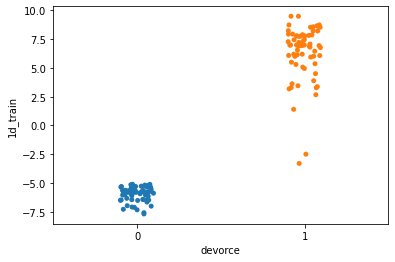

In [56]:
#PCA를 사용한 차원 감소를 통한 특징 추출
from sklearn.decomposition import PCA

pca = PCA(n_components=1)                                 # 1차원 벡터로 사영
x_train_pca=pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

#PCA 결과
data_pca = pd.DataFrame({"1d_train" : x_train_pca.reshape(y_train.shape[0]), "devorce" : y_train})
sns.stripplot(x="devorce", y="1d_train", data = data_pca)


<AxesSubplot:xlabel='devorce', ylabel='1d_train'>

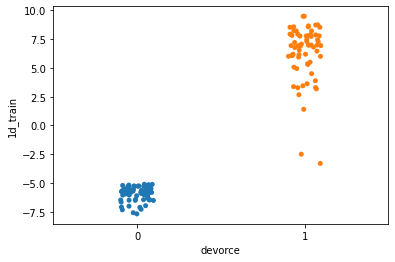

In [59]:
#PCA를 사용한 차원 감소를 통한 특징 추출
from sklearn.decomposition import PCA

pca = PCA(n_components=1)                                 # 1차원 벡터로 사영
x_train_pca=pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

#PCA 결과
data_pca = pd.DataFrame({"1d_train" : x_train_pca.reshape(y_train.shape[0]), "devorce" : y_train})
sns.stripplot(x="devorce", y="1d_train", data = data_pca)


In [47]:
data_pca

,1d_train,devorce
0,-5.958650,0
1,-6.512826,0
2,-6.664024,0
3,-5.383686,0
4,-5.288422,0
...,...,...
131,-2.505966,1
132,-6.340192,0
133,6.003094,1
134,-5.765748,0


### 분류기(Bayes, K-NN)
#### Bayes 분류기

In [41]:
# Bayes 분류
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(x_train_lda,y_train)  # LDA를 한 특징 데이터에 베이즈 분류기 사용
# GNB.fit(x_train_pca,y_train)  # PCA를 한 특징 데이터에 베이즈 분류기 사용

y_Bayes = GNB.predict(x_test_lda)
# y_Bayes = GNB.predict(x_test_pca)

print(y_Bayes)
print(y_test)

print('Classification error:')
print(np.sum(np.abs(y_Bayes - y_test)>0)/y_test.shape[0])

[0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1]
[0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1]
Classification error:
0.058823529411764705


#### K-NN 분류기

In [42]:
# K-NN 분류
from scipy.spatial import distance
from sklearn.neighbors import  KNeighborsClassifier

KNF = KNeighborsClassifier(n_neighbors= 10)  # 인접한 10개의 데이터 중 많은 그룹에 포함
KNF.fit(x_train_lda,y_train)  # LDA를 한 특징 데이터에 K-NN분류기 사용
# KNF.fit(x_train_pca,y_train)  # PCA를 한 특징 데이터에 K-NN분류기 사용

y_KNN = KNF.predict(x_test_lda)
# y_KNN = KNF.predict(x_test_pca)

print(y_KNN)
print(y_test)

print('Classification error:')
print(np.sum(np.abs(y_KNN - y_test)>0)/y_test.shape[0])  # 오차값 출력

[0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1]
[0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1]
Classification error:
0.058823529411764705
